In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation and validation libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler

# Classifier libraries
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
df = pd.read_csv('winequality-red.csv')

In [4]:
df['quality'] = np.where(df['quality'] >= 7, 1, 0)

### Preprocessing

In [5]:
X_train, X_test = train_test_split(df, test_size=0.20, random_state=42)
print("Train size: ", X_train.shape)
print("Test size: ", X_test.shape)

Train size:  (1279, 12)
Test size:  (320, 12)


In [6]:
def oversample_dataset(data):
    X = data.drop(columns={'quality'})
    y = data['quality']
    
    sm = SMOTE(random_state=42)
    
    X_sm, y_sm = sm.fit_resample(X, y)
    sm_df = pd.concat([X_sm, y_sm], axis=1)
    
    return sm_df

X_train_sm = oversample_dataset(X_train)

In [7]:
y_train = X_train_sm['quality']
y_test = X_test['quality']
X_train = X_train_sm.drop(columns={'quality'})
X_test = X_test.drop(columns={'quality'})

print("Train size: ", X_train.shape)
print("Test size: ", X_test.shape)

Train size:  (2218, 11)
Test size:  (320, 11)


In [8]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

### Model

<AxesSubplot:title={'center':'Losses vs Precision'}, xlabel='Loss', ylabel='Precision'>

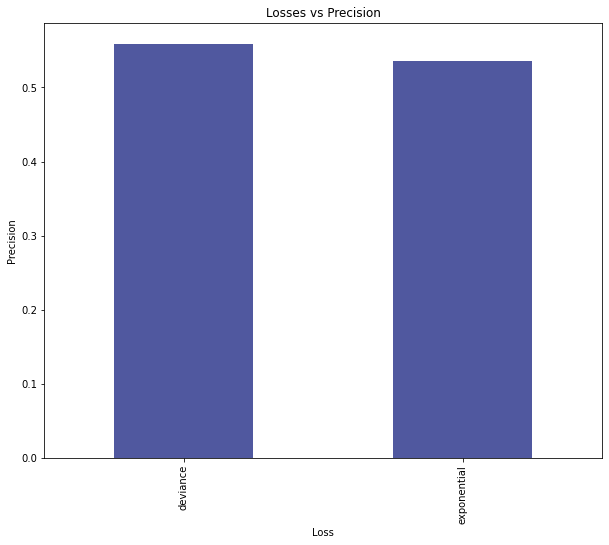

In [11]:
scores = []
loss_score = []

losses = ['deviance', 'exponential']

for i in losses:    
    model = GradientBoostingClassifier(loss=i, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    score = precision_score(y_test, y_pred)
    scores.append(score)
    loss_score.append([i, score])
    
plt.figure(figsize=(10,8))
plt.title("Losses vs Precision")
plt.xlabel("Loss")
plt.ylabel("Precision")
pd.Series(scores, losses).plot(kind='bar', color='#50589F')

In [12]:
id_loss = pd.DataFrame(loss_score, columns=['feature', 'score'])['score'].idxmax()
loss = pd.DataFrame(loss_score, columns=['feature', 'score'])['feature'][id_loss]
print("loss:", loss)

loss: deviance


<AxesSubplot:title={'center':'Learning Rates vs Precision'}, xlabel='Learning Rates', ylabel='Precision'>

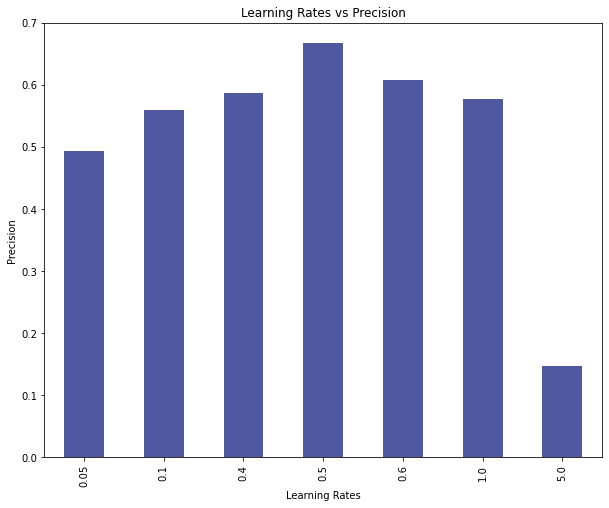

In [18]:
scores = []
learning_score = []

learning_rates = [0.05, 0.1, 0.4, 0.5, 0.6, 1, 5]

for i in learning_rates:    
    model = GradientBoostingClassifier(learning_rate=i, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    score = precision_score(y_test, y_pred)
    scores.append(score)
    learning_score.append([i, score])
    
plt.figure(figsize=(10,8))
plt.title("Learning Rates vs Precision")
plt.xlabel("Learning Rates")
plt.ylabel("Precision")
pd.Series(scores, learning_rates).plot(kind='bar', color='#50589F')

In [19]:
id_lr = pd.DataFrame(learning_score, columns=['feature', 'score'])['score'].idxmax()
learning_rate = pd.DataFrame(learning_score, columns=['feature', 'score'])['feature'][id_lr]
print("learning_rate:", learning_rate)

learning_rate: 0.5


<AxesSubplot:title={'center':'Max Depth vs Precision'}, xlabel='Max Depth', ylabel='Precision'>

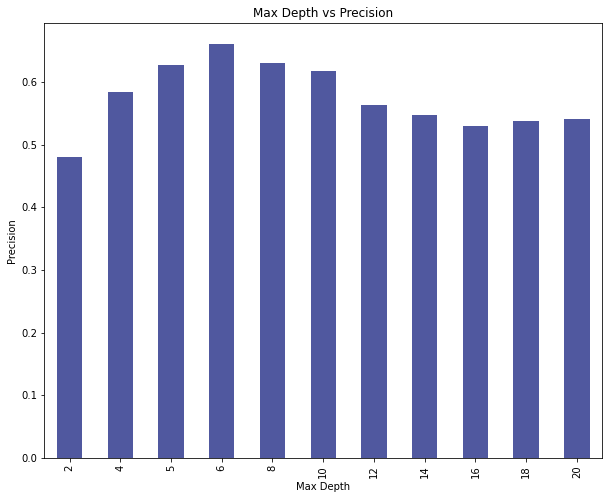

In [21]:
scores = []
depth = []

max_depths = [2, 4, 5, 6, 8, 10, 12, 14, 16, 18, 20]

for i in max_depths:
    model = GradientBoostingClassifier(max_depth=i, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    score = precision_score(y_test, y_pred)
    scores.append(score)
    depth.append([i, score])
    
plt.figure(figsize=(10,8))
plt.title("Max Depth vs Precision")
plt.xlabel("Max Depth")
plt.ylabel("Precision")
pd.Series(scores, max_depths).plot(kind='bar', color="#50589F")

In [22]:
id_depth = pd.DataFrame(depth, columns=['feature', 'score'])['score'].idxmax()
max_depth = pd.DataFrame(depth, columns=['feature', 'score'])['feature'][id_depth]
print("max_depth:", max_depth)

max_depth: 6


<AxesSubplot:title={'center':'Max Features vs Precision'}, xlabel='Max Features', ylabel='Precision'>

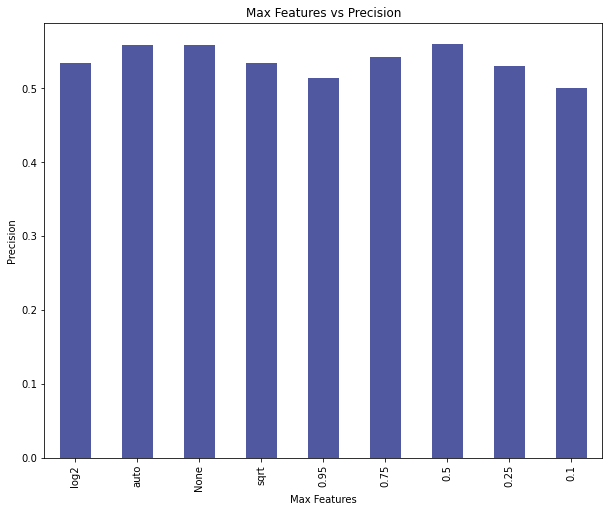

In [23]:
scores = []
features = []

max_features = ['log2', 'auto', None, 'sqrt', 0.95, 0.75, 0.5, 0.25, 0.10]

for i in max_features:
    model = GradientBoostingClassifier(max_features=i, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    score = precision_score(y_test, y_pred)
    scores.append(score)
    features.append([i, score])
    
plt.figure(figsize=(10,8))
plt.title("Max Features vs Precision")
plt.xlabel("Max Features")
plt.ylabel("Precision")
pd.Series(scores, max_features).plot(kind='bar', color="#50589F")

In [24]:
id_features = pd.DataFrame(features, columns=['feature', 'score'])['score'].idxmax()
max_features = pd.DataFrame(features, columns=['feature', 'score'])['feature'][id_features]
print("max_features:", max_features)

max_features: 0.5


In [25]:
def gradient_boosting_features(X_train, X_test, y_train, y_test):

    loss_score = []
    losses = ['deviance', 'exponential']

    for i in losses:    
        model = GradientBoostingClassifier(loss=i, random_state=42)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        score = precision_score(y_test, y_pred)
        loss_score.append([i, score])
    
    id_loss = pd.DataFrame(loss_score, columns=['feature', 'score'])['score'].idxmax()
    loss = pd.DataFrame(loss_score, columns=['feature', 'score'])['feature'][id_loss]
    

    learning_score = []
    learning_rates = [0.05, 0.1, 0.4, 0.5, 0.6, 1, 5]

    for i in learning_rates:    
        model = GradientBoostingClassifier(learning_rate=i, random_state=42)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        score = precision_score(y_test, y_pred)
        learning_score.append([i, score])
        
    id_lr = pd.DataFrame(learning_score, columns=['feature', 'score'])['score'].idxmax()
    learning_rate = pd.DataFrame(learning_score, columns=['feature', 'score'])['feature'][id_lr]
    

    depth = []
    max_depths = [2, 4, 5, 6, 8, 10, 12, 14, 16, 18, 20]

    for i in max_depths:
        model = GradientBoostingClassifier(max_depth=i, random_state=42)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        score = precision_score(y_test, y_pred)
        depth.append([i, score])
        
    id_depth = pd.DataFrame(depth, columns=['feature', 'score'])['score'].idxmax()
    max_depth = pd.DataFrame(depth, columns=['feature', 'score'])['feature'][id_depth]
    

    features = []
    max_features = ['log2', 'auto', None, 'sqrt', 0.95, 0.75, 0.5, 0.25, 0.10]

    for i in max_features:
        model = GradientBoostingClassifier(max_features=i, random_state=42)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        score = precision_score(y_test, y_pred)
        features.append([i, score])
        
    id_features = pd.DataFrame(features, columns=['feature', 'score'])['score'].idxmax()
    max_features = pd.DataFrame(features, columns=['feature', 'score'])['feature'][id_features]
    
    response = {
        "loss": loss,
        "learning_rate": learning_rate,
        "max_depth": max_depth,
        "max_features": max_features
    }
        
    return response

In [26]:
gradient_boosting_features(X_train_scaled, X_test_scaled, y_train, y_test)

{'loss': 'deviance', 'learning_rate': 0.5, 'max_depth': 6, 'max_features': 0.5}